In [1]:
import os
os.chdir('/content/drive/MyDrive/DLProject/Nghia')

In [2]:
from tensorflow.keras.backend import image_data_format
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt


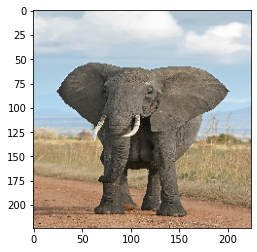

(224, 224, 3)
(1, 224, 224, 3)
Predicted: [('n02504458', 'African_elephant', 0.92251813), ('n01871265', 'tusker', 0.041304547), ('n02504013', 'Indian_elephant', 0.024472019)]


In [4]:
# image classification models
model = ResNet50(weights='imagenet')
img_path = 'elephant.jpg'
img = image.load_img(img_path, target_size=(224,224))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
print(x.shape)
x = np.expand_dims(x, axis=0)
print(x.shape)
x = preprocess_input(x)
pred = model.predict(x)
print('Predicted:', decode_predictions(pred, top=3)[0])

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np

base_model = VGG19(weights='imagenet')
base_model.summary()

574717952/574710816 [==============================] - 4s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [ ]:
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block4_pool').output)

img_path = 'elephant.jpg'
img = image.load_img(img_path, target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
block4_pool_features = model.predict(x)